In [2]:
# Install the RDKit library and the PubChempy library
!pip install rdkit-pypi
!pip install pubchempy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 35.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=b58122ccff68782f35aa1b0ae42985220b408d2aea4aa7459b080fe4d0442d02
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy


In [3]:
# Import all the necessary and required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
import pubchempy as pcp
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from collections import Counter

In [4]:
# Creating a function for getting the molecule names
def get_smiles(name):
  compound = pcp.get_compounds(name, 'name')
  if compound:
    return compound[0].isomeric_smiles
  else:
    return None

In [5]:
# Create a function for displaying the number of atoms
def show_atom_number(mol, label):
     # Iterate over all atoms in the molecule
    for atom in mol.GetAtoms():
       # Set a label for each atom with the atom's index
        atom.SetProp(label, str(atom.GetIdx()+1))

    # Return the modified molecule
    return mol

In [6]:
# Function to convert a number to a subscript
def convert_to_subscript(number):
    subscript_digits = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
    return str(number).translate(subscript_digits)

In [7]:
# Function to count the number of aromatic bonds
def count_aromatic_bonds(smiles):
    mol = Chem.MolFromSmiles(smiles)
    aromatic_bonds = sum(1 for bond in mol.GetBonds() if bond.GetIsAromatic())
    return aromatic_bonds

In [8]:
# Function to generate chemical formulas
def generate_chemical_formula(molecule):
    atom_counts = Counter([atom.GetSymbol() for atom in molecule.GetAtoms()])
    formula = ''

    for element, count in atom_counts.items():
        if count == 1:
            formula += element
        else:
            formula += element + convert_to_subscript(count)

    return formula

Propane: CCC
Number of atoms: 3
Atomic Weight: 44.062600255999996g/mol
Number of heavy atoms: 3
Number of Valence Electrons: 20
Number of Aromatic Bonds: 0
Chemical formula: C₃


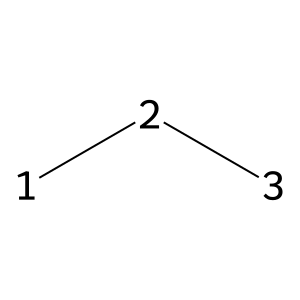

Ethene: C=C
Number of atoms: 2
Atomic Weight: 28.031300127999998g/mol
Number of heavy atoms: 2
Number of Valence Electrons: 12
Number of Aromatic Bonds: 0
Chemical formula: C₂


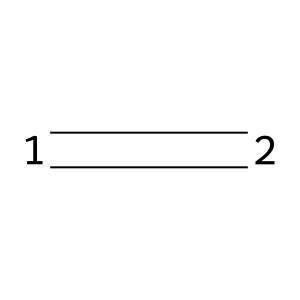

Cyclohexane: C1CCCCC1
Number of atoms: 6
Atomic Weight: 84.093900384g/mol
Number of heavy atoms: 6
Number of Valence Electrons: 36
Number of Aromatic Bonds: 0
Chemical formula: C₆


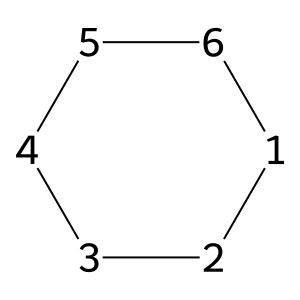

Buckminsterfullerene: C12=C3C4=C5C6=C1C7=C8C9=C1C%10=C%11C(=C29)C3=C2C3=C4C4=C5C5=C9C6=C7C6=C7C8=C1C1=C8C%10=C%10C%11=C2C2=C3C3=C4C4=C5C5=C%11C%12=C(C6=C95)C7=C1C1=C%12C5=C%11C4=C3C3=C5C(=C81)C%10=C23
Number of atoms: 60
Atomic Weight: 720.0g/mol
Number of heavy atoms: 60
Number of Valence Electrons: 240
Number of Aromatic Bonds: 90
Chemical formula: C₆₀


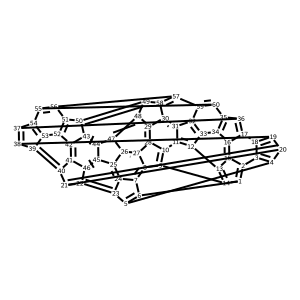

In [9]:
# List of molecule names
molecule_names = ["Propane", "Ethene", "Cyclohexane", "Buckminsterfullerene"]

# Create a dictionary of molecule names and their corresponding SMILES
smiles_dict = {name: get_smiles(name) for name in molecule_names}

# Create a list to store molecules
mol_list = []

# Print the SMILES for each molecule
for name, smiles in smiles_dict.items():
  print(f"{name}: {smiles}")

  if smiles:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)
    mol_atom = show_atom_number(mol, 'atomLabel')

    # Draw the molecule
    img = Draw.MolToImage(mol_atom, size=(300, 300), legends=[name])

    # Calculate the exact molecular weight of the molecule
    atomic_weight = Chem.Descriptors.ExactMolWt(mol_atom)

    # Get the total numbe of atoms in the molecule
    atom_num = mol_atom.GetNumAtoms()

    # Calculate the number of heavy atoms in the molecule
    heavy_atom_count = Chem.Descriptors.HeavyAtomCount(mol)

    #Calculate the number of valence electrons in the molecule
    valence_electrons = Chem.Descriptors.NumValenceElectrons(mol)

    # Calculate the number of aromatic bonds in the molecule
    aromatic_bonds = count_aromatic_bonds(smiles)

    # Generate the chemical formula of the molecule
    chemical_formula = generate_chemical_formula(mol)


    # Print the results
    print(f"Number of atoms: {atom_num}")
    print(f"Atomic Weight: {atomic_weight}g/mol")
    print(f"Number of heavy atoms: {heavy_atom_count}")
    print(f"Number of Valence Electrons: {valence_electrons}")
    print(f"Number of Aromatic Bonds: {aromatic_bonds}")
    print("Chemical formula:", chemical_formula)

    # Display the molecule image
    display(img)


In [10]:
# Load the Dataset
data = pd.read_csv("solubility.csv")
# Assign the first 6 rows on the dataset
data_6 = data.head(6)


In [11]:
# Generate RDKit molecule objects
molecules_6 = [Chem.MolFromSmiles(smiles) for smiles in data_6['smiles']]
labels = data_6['Compound ID'].tolist()

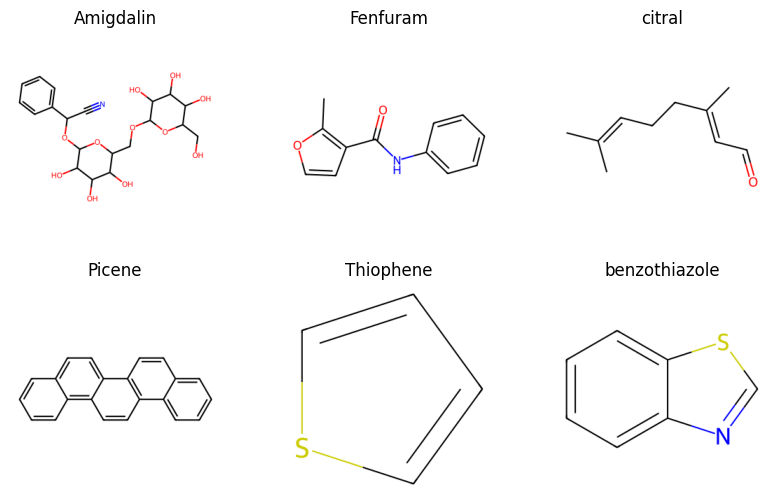

In [12]:
# Assign the grid layout for the molecule structures
num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

# Flatting grid for iteration purposes
axes = axes.flatten()

#Draw each molecule
for i, (mol, label) in enumerate(zip(molecules_6, labels)):
    # Draw the molecule on the subplot
    img = Draw.MolToImage(mol, size=(300, 300))
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(label)

# Adjust the layout
plt.show()
